In [1]:
from sklearn.model_selection import train_test_split

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import scipy.io
from scipy import stats
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_validate
import sklearn.tree
import random
import pandas as pd

import os
import itertools
import collections
import heapq
import math
import matplotlib.pylab as pl
from matplotlib import rcParams

In [2]:
## Set font size for later use
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

## initialize field matrix
topleft_field = np.array([["A","F","E"],["B","C","D"]],dtype='<U3')
botleft_field = np.array([["d","c","b"],["e","f","a"]],dtype='<U3')
topright_field = np.array([["i","vi","v"],["ii","iii","iv"]],dtype='<U3')
botright_field = np.array([["\u03B4","\u03B3","\u03B2"],["\u03B5","\u03C6","\u03B1"]],dtype='<U3')

In [3]:
## https://www.geeksforgeeks.org/rotate-matrix-elements/
## https://stackoverflow.com/questions/34821565/drawing-matrix-plot-in-python
def rotateMatrix(mat):
 
    if not len(mat):
        return
     
    """
        top : starting row index
        bottom : ending row index
        left : starting column index
        right : ending column index
    """
 
    top = 0
    bottom = len(mat)-1
 
    left = 0
    right = len(mat[0])-1
 
    while left < right and top < bottom:
 
        # Store the first element of next row,
        # this element will replace first element of
        # current row
        prev = mat[top+1][left]
 
        # Move elements of top row one step right
        for i in range(left, right+1):
            curr = mat[top][i]
            mat[top][i] = prev
            prev = curr
 
        top += 1
 
        # Move elements of rightmost column one step downwards
        for i in range(top, bottom+1):
            curr = mat[i][right]
            mat[i][right] = prev
            prev = curr
 
        right -= 1
 
        # Move elements of bottom row one step left
        for i in range(right, left-1, -1):
            curr = mat[bottom][i]
            mat[bottom][i] = prev
            prev = curr
 
        bottom -= 1
 
        # Move elements of leftmost column one step upwards
        for i in range(bottom, top-1, -1):
            curr = mat[i][left]
            mat[i][left] = prev
            prev = curr
 
        left += 1
 
    return mat
 
def rotate(mat, t, cycle):
    # rotate clockwise t times
    # first time when rotations cycle
    for i in range(t%cycle):
        mat = rotateMatrix(mat)
    return mat

def endStageRotate4(field):
    # this function is not generalized
    prev = np.copy(field[1][1,:])
    nxt = None
    field[1][1,np.arange(3)] = np.copy(field[0][1,:])
    nxt = np.copy(field[3][0,:])
    field[3][0,np.arange(3)]=prev[::-1]
    prev = nxt
    nxt = np.copy(field[2][0,:])
    field[2][0,np.arange(3)] = prev
    prev = nxt
    field[0][1,np.arange(3)]=prev[::-1]
    
def drawMatrix(A):

    m = len(A)
    n = len(A[0])
    if True:
        for krow, row in enumerate(A):

            for kcol, num in enumerate(row):

                plt.text(10*kcol + 5, 10*krow + 5, num,
                         horizontalalignment='center',
                         verticalalignment='center')

        plt.axis([0, 10*n, 10*m , 0])
        plt.xticks(np.linspace(0, 10*n, n + 1), [])
        plt.yticks(np.linspace(0, 10*m, m + 1), [])
        plt.grid(linestyle="solid")



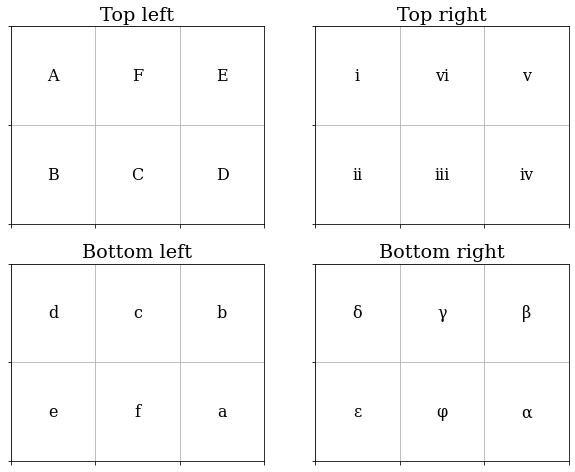

In [4]:
## figure on pg. 3
field_width = 2
field_length = 2
fields = [topleft_field,topright_field,botleft_field,botright_field]
field_name = ["Top left", "Top right", "Bottom left","Bottom right"]
def makePlots(fields):
    plt.figure(figsize=(10,8))
    for i in range(1,field_width*field_length+1):
        plt.subplot(field_length,field_width,i)
        drawMatrix(fields[i-1])
        plt.title(field_name[i-1])
makePlots(fields)

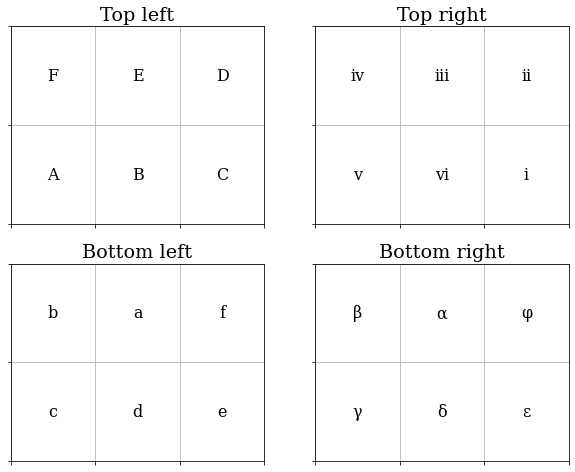

In [5]:
## figure on pg. 3
cardinality = 6
rot_times = [5,3,4,4]
for m,t in zip(fields,rot_times):
    rotate(m,t,cardinality)
makePlots(fields)

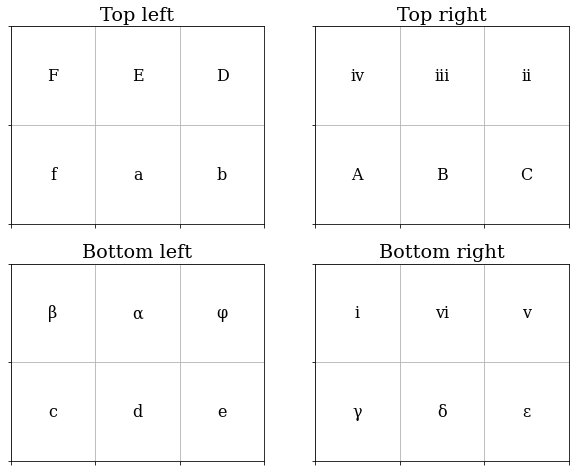

In [6]:
# At the end of one stage, the players in the back row of each team stay
# in these positions for the start of the next game, while the front row players
# move (clockwise in the gym) to the same positions in the next quadrant.
endStageRotate4(fields)
makePlots(fields)

In [7]:
j = np.array([["i","vi","sss"],["ii","iii","iv"]])
s = np.array([["1","1","1"],["2","2","2ss"]])
k = np.copy(j[0,:])
print(k)
s[0,np.arange(3)] = k
print(s)
print(k)

['i' 'vi' 'sss']
[['i' 'vi' 'sss']
 ['2' '2' '2ss']]
['i' 'vi' 'sss']
